# 7.8.3 GAMs

In [1]:
library(ISLR2)
library(splines)
attach(Wage)
agelims <- range(age)
age.grid <- seq(from = agelims[1], to = agelims[2])

We now fit a GAM to predict `wage` using natural spline functions of `year` and `age`, treating `education` as a qualitative predictor, as in (7.16). Since this is just a big linear regression model using an appropriate choice of basis functions, we can simply do this using the `lm()` function.

In [2]:
gam1 <- lm(wage ~ ns(year, 4) + ns(age, 5) + education, data = Wage)

We now fit the model (7.16) using smoothing splines rather than natural splines. In order to fit more general sorts of GAMs, using smoothing splines or other components that cannot be xpressed in terms of basis functions and then fit using least squares regression, we will need to use the `gam` library in `R`.  

The `s()` function, which is part of the `gam` library, is used to indicate that we would like to use a smoothing spline. We specify that the function of `year` should have 4 degrees of freedom, and that the function of `age` will have 5 degrees of freedom. Since `education` is qualitative, we leave it as is, and it is converted into four dummy variables. We use the `gam()` function in order to fit a GAM using these components. All of the terms in (7.16) are fit simultaneously, taking each other into account to explain the response.

In [3]:
library(gam)
gam.m3 <- gam(wage ~ s(year, 4) + s(age, 5) + education, data = Wage)

Loading required package: foreach

Loaded gam 1.22-3




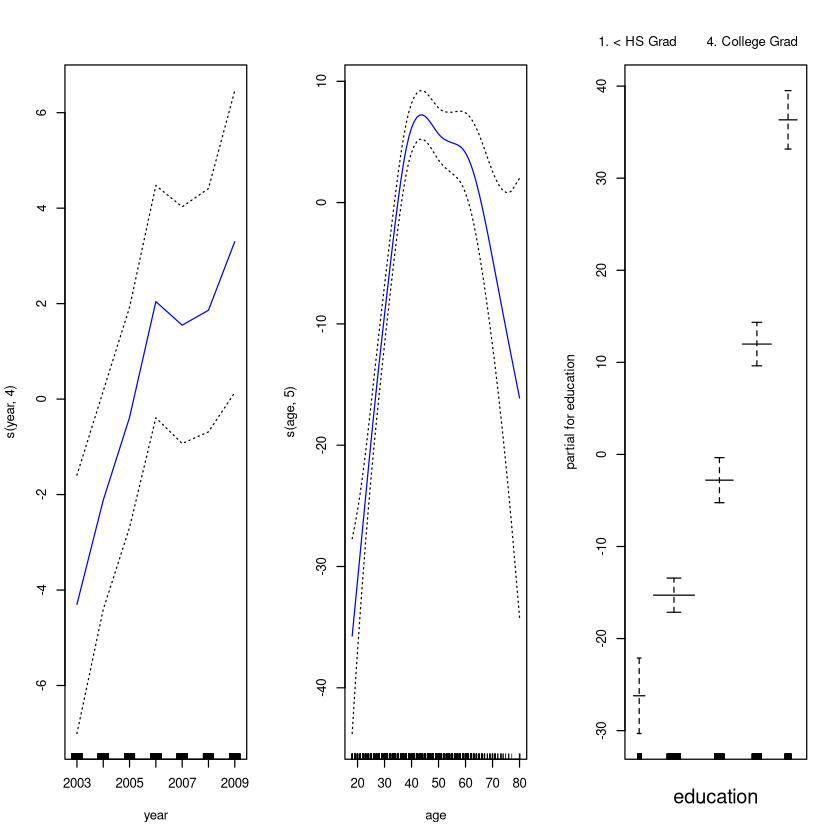

In [4]:
par(mfrow = c(1, 3))
plot(gam.m3, se = TRUE, col = "blue")

The generic `plot()` function recognizes that `gam.m3` is an object of class `Gam`, and involves the appropriate `plot.Gam()` method. Conveniently, even though `gam1` is not of class `Gam` but rather of class `lm`, we can _still_ use `plot.Gam()` on it. Figure 7.11 was produced using the following expression:

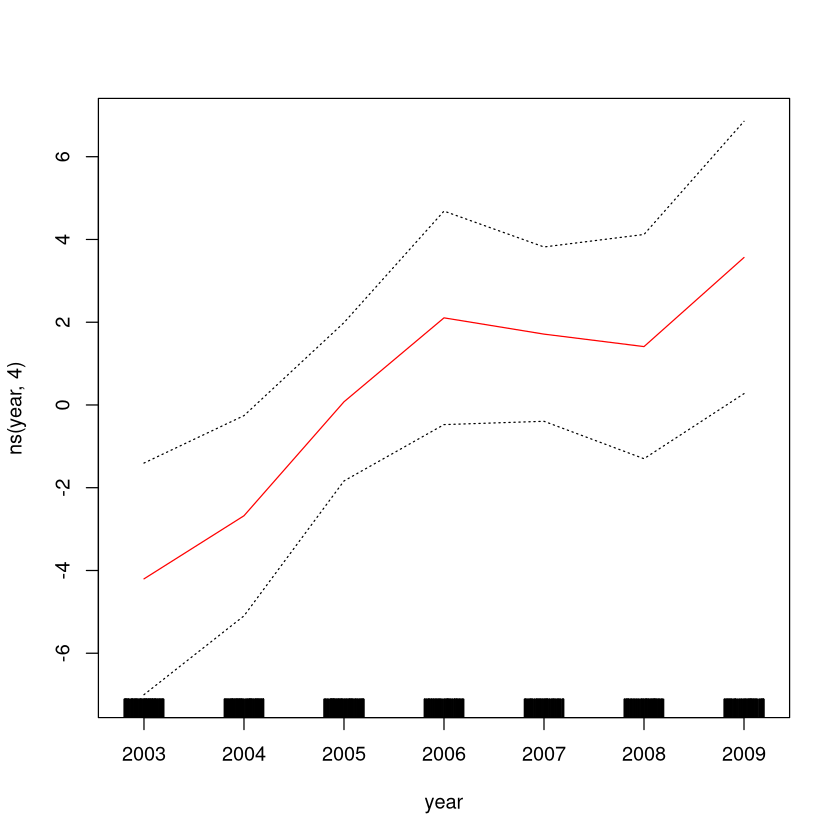

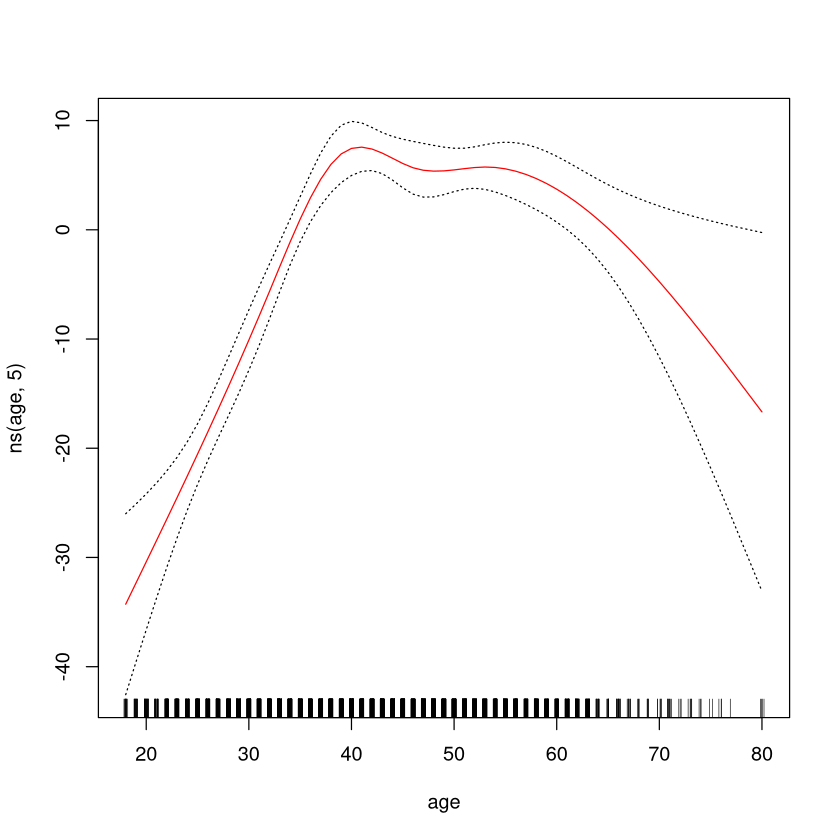

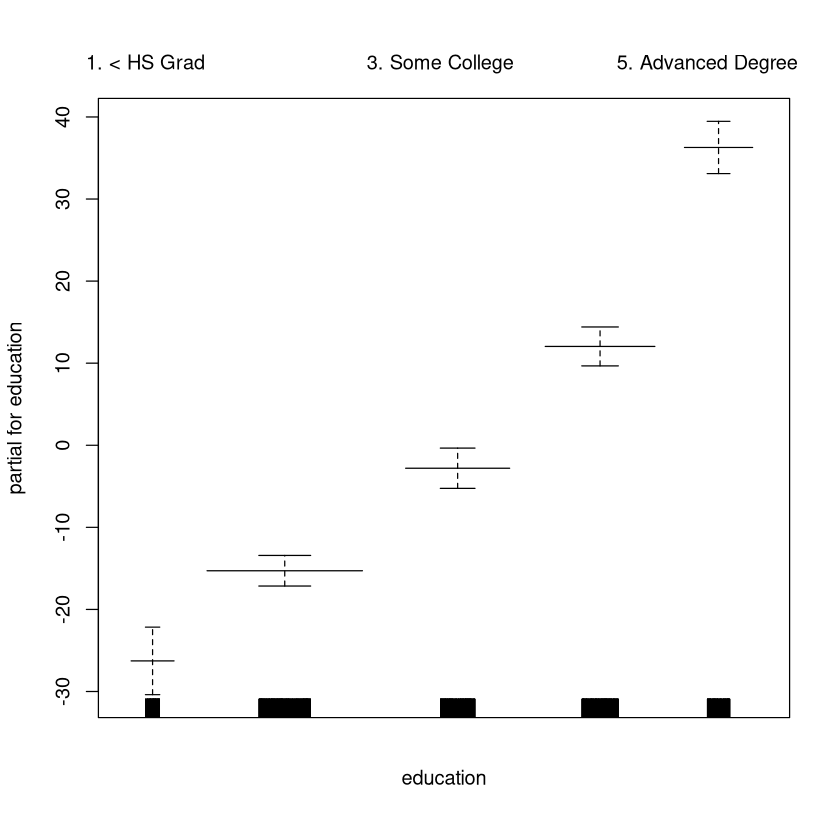

In [5]:
plot.Gam(gam1, se = TRUE, col = "red")

Notice here we had to use `plot.Gam()` rather than the _generic_ `plot()` function.  

In these plots, the function of `year` looks rather linear. We can perform a series of ANOVA tests in order to determine which of these three models is best: a GAM that excludes `year` ($\cal{M}_1$), a GAM that uses a linear function of `year` ($\cal{M}_2$), or a GAM that uses a spline function for `year` ($\cal{M}_3$).

In [6]:
gam.m1 <- gam(wage ~ s(age, 5) + education, data = Wage)
gam.m2 <- gam(wage ~ year + s(age, 5) + education, data = Wage)
anova(gam.m1, gam.m2, gam.m3, test = "F")

,Resid. Df,Resid. Dev,Df,Deviance,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2990,3711731,NA,NA,NA,NA
2,2989,3693842,1.000000,17889.243,14.477130,0.0001447167
3,2986,3689770,2.999989,4071.134,1.098212,0.3485661430


We find that there is compelling evidence that a GAM with a linear function of `year` is better than a GAM that does not include `year` at all (p-value = $0.00014$). However, there is no evidence that a non-linear function of `year` is needed (p-value = $0.349$). In other words, based on the results of this ANOVA, $\cal{M}_2$ is preferred.  

The `summary()` function produces a summary of the gam fit.

In [7]:
summary(gam.m3)


Call: gam(formula = wage ~ s(year, 4) + s(age, 5) + education, data = Wage)
Deviance Residuals:
    Min      1Q  Median      3Q     Max 
-119.43  -19.70   -3.33   14.17  213.48 

(Dispersion Parameter for gaussian family taken to be 1235.69)

    Null Deviance: 5222086 on 2999 degrees of freedom
Residual Deviance: 3689770 on 2986 degrees of freedom
AIC: 29887.75 

Number of Local Scoring Iterations: NA 

Anova for Parametric Effects
             Df  Sum Sq Mean Sq F value    Pr(>F)    
s(year, 4)    1   27162   27162  21.981 2.877e-06 ***
s(age, 5)     1  195338  195338 158.081 < 2.2e-16 ***
education     4 1069726  267432 216.423 < 2.2e-16 ***
Residuals  2986 3689770    1236                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Anova for Nonparametric Effects
            Npar Df Npar F  Pr(F)    
(Intercept)                          
s(year, 4)        3  1.086 0.3537    
s(age, 5)         4 32.380 <2e-16 ***
education                            
--

The "Anova for Paramteric Effects" p-values clearly demonstrate that `year`, `age`, and `education` are all highly statistically significant, even when only assuming a linear relationship. Alternatively, the "Anova for Nonparametric Effects" p-values for `year` and `age` correspond to a null hypothesis of a linear relationship versus the alternative of a non-linear relationship. The large p-value for `year` reinforces our conclusion for the ANOVAA test that a linear funciton is adequate for this term. However, there is very clear evidence that a non-linear term is required for `age`.  

We can make predictions using the `predict()` method for the class `Game`. Here we make predictions on the training set.

In [8]:
preds <- predict(gam.m2, newdata = Wage)

We can also use local regression fits as building blocks in a GAM, using the `lo()` function.

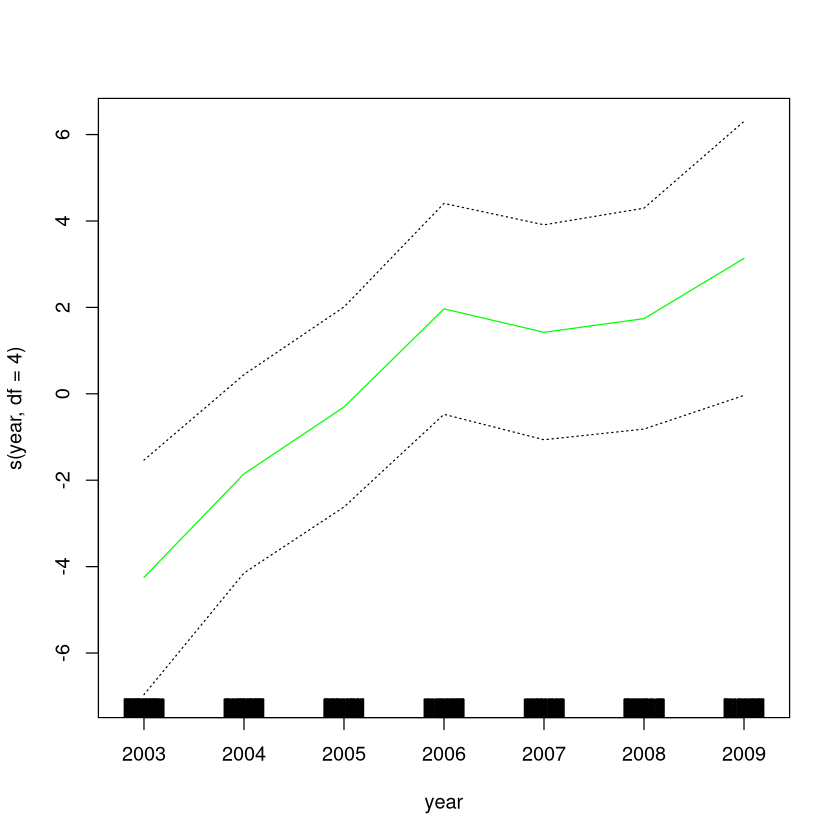

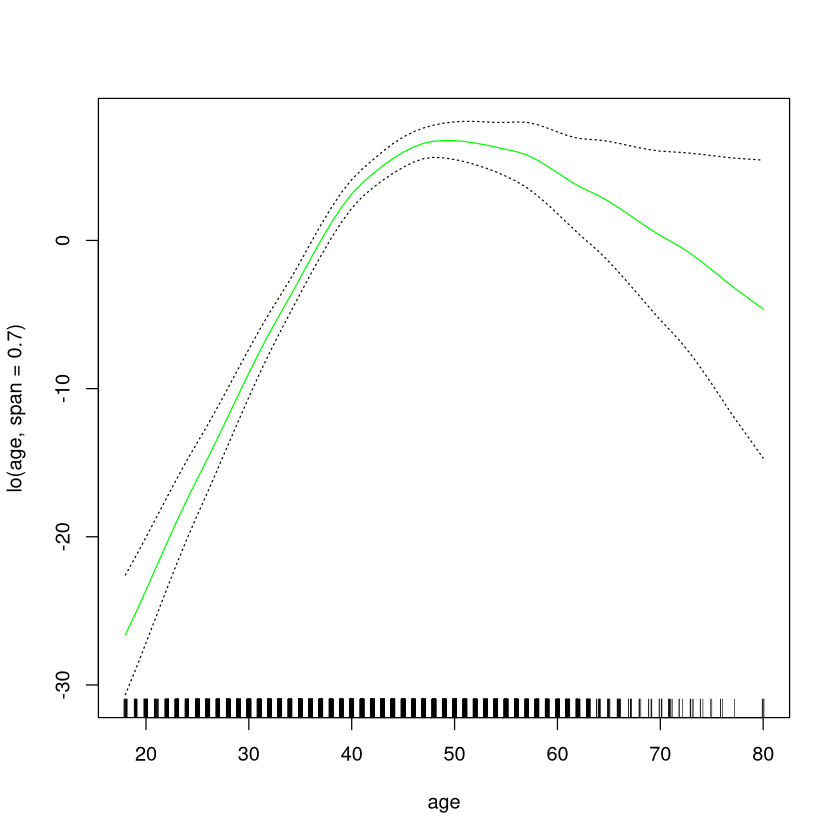

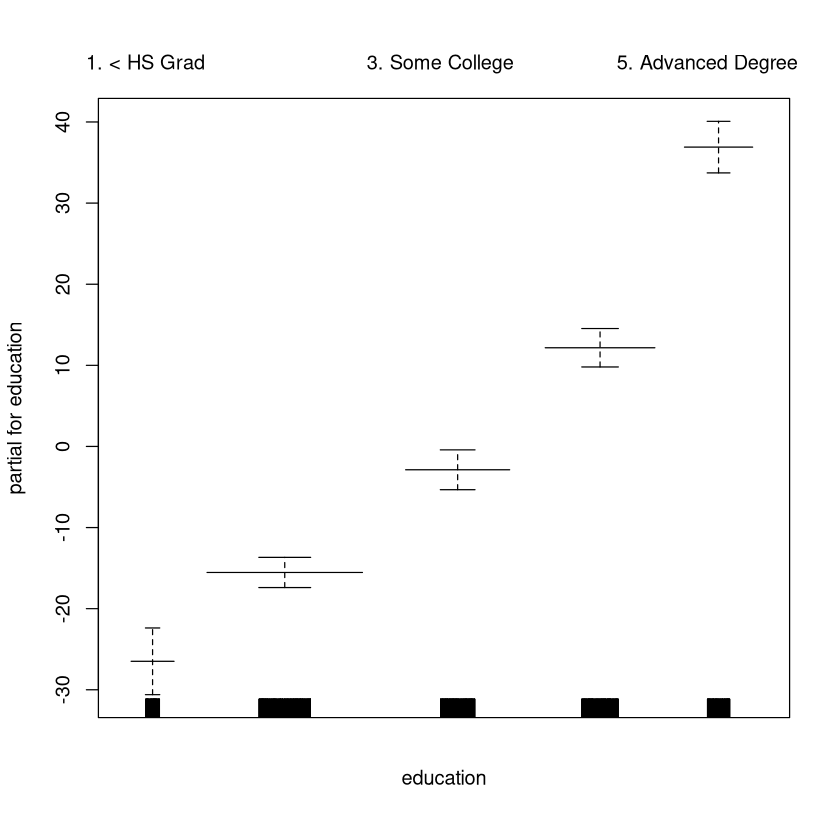

In [9]:
gam.lo <- gam( wage ~ s(year, df = 4) + lo(age, span = 0.7) + education, data = Wage)
plot.Gam(gam.lo, se = TRUE, col = "green")

Here we have used local regression for the `age` term, with a span of 0.7. We can also use the `lo()` function to create interactions before calling the `gam()` function. For example,

In [10]:
gam.lo.i <- gam(wage ~ lo(year, age, span = 0.5) + education, data = Wage)

Warning message in lo.wam(x, z, wz, fit$smooth, which, fit$smooth.frame, bf.maxit, :
“liv too small.    (Discovered by lowesd)”
Warning message in lo.wam(x, z, wz, fit$smooth, which, fit$smooth.frame, bf.maxit, :
“lv too small.     (Discovered by lowesd)”
Warning message in lo.wam(x, z, wz, fit$smooth, which, fit$smooth.frame, bf.maxit, :
“liv too small.    (Discovered by lowesd)”
Warning message in lo.wam(x, z, wz, fit$smooth, which, fit$smooth.frame, bf.maxit, :
“lv too small.     (Discovered by lowesd)”


fits a two-term model, in which the first term is an interaction between `year` and `age`, fit by a local regression surface. We can plot the resulting two-dimensional surface if we first install the `akima` package.

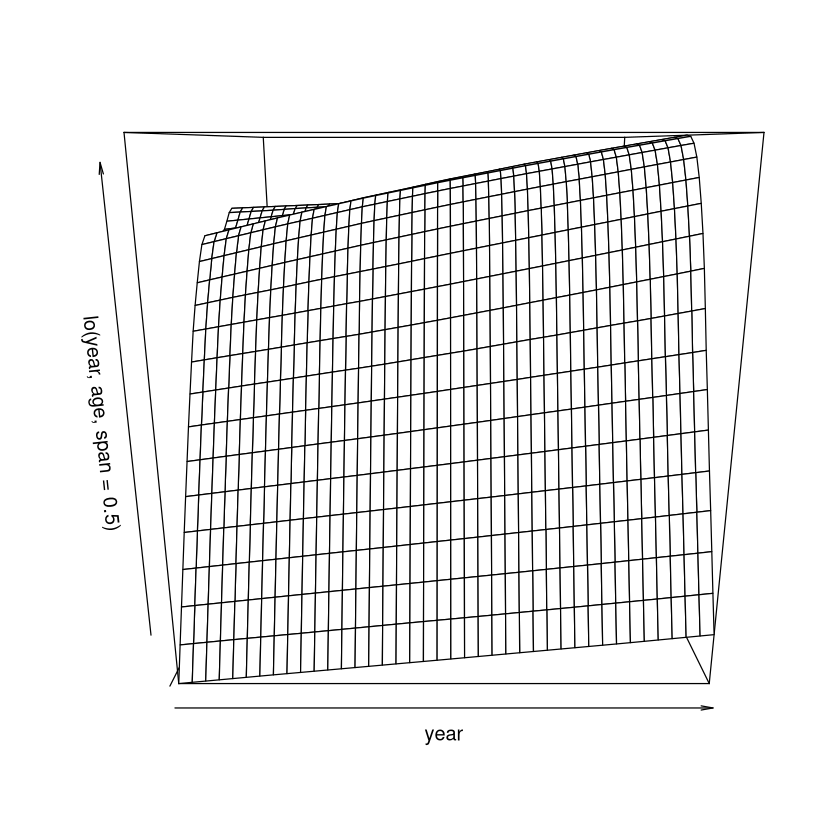

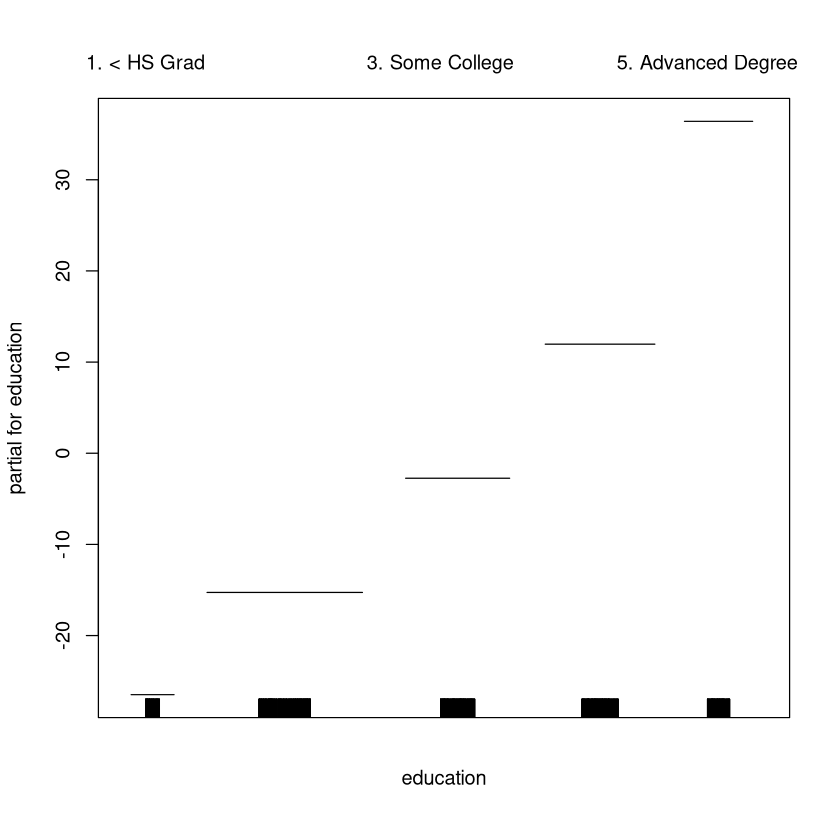

In [11]:
library(akima)
plot(gam.lo.i)

In order to fit a logistic regression GAM, we once again use the `I()` function in constructing the binary response variable, and set `family=binomial`.

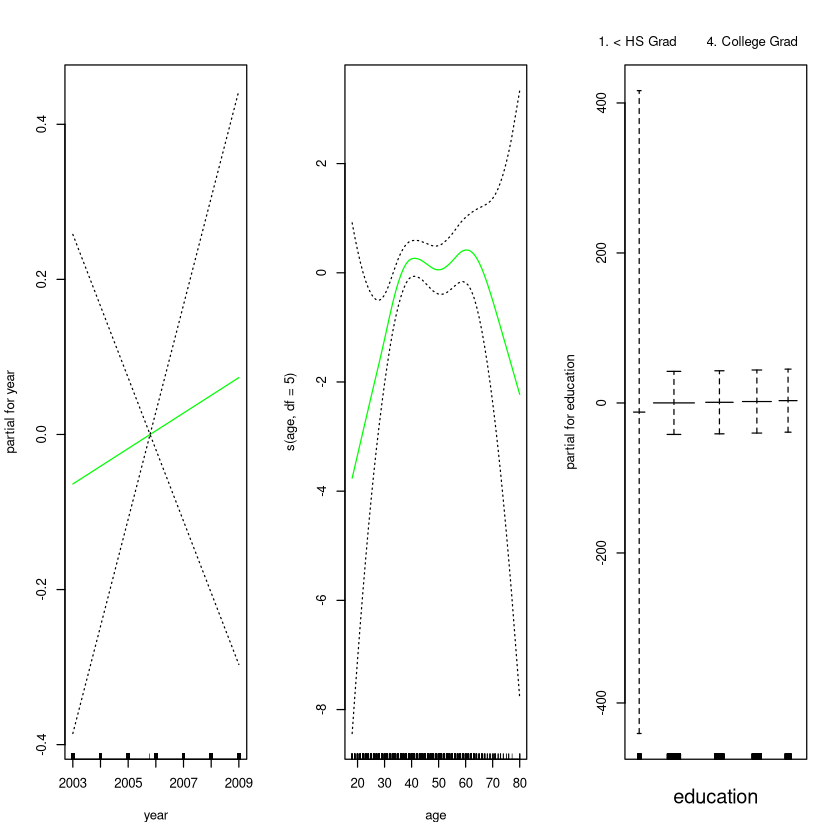

In [12]:
gam.lr <- gam(I(wage > 250) ~ year + s(age, df = 5) + education, family = binomial, data = Wage)
par(mfrow = c(1, 3))
plot(gam.lr, se = T, col = "green")

It is easy to see that there are no high earners in the `< HS` category:

In [13]:
table(education, I(wage > 250))

                    
education            FALSE TRUE
  1. < HS Grad         268    0
  2. HS Grad           966    5
  3. Some College      643    7
  4. College Grad      663   22
  5. Advanced Degree   381   45

Hence, we fit a logistic regression GAm using all but this category. This provides more sensible results.

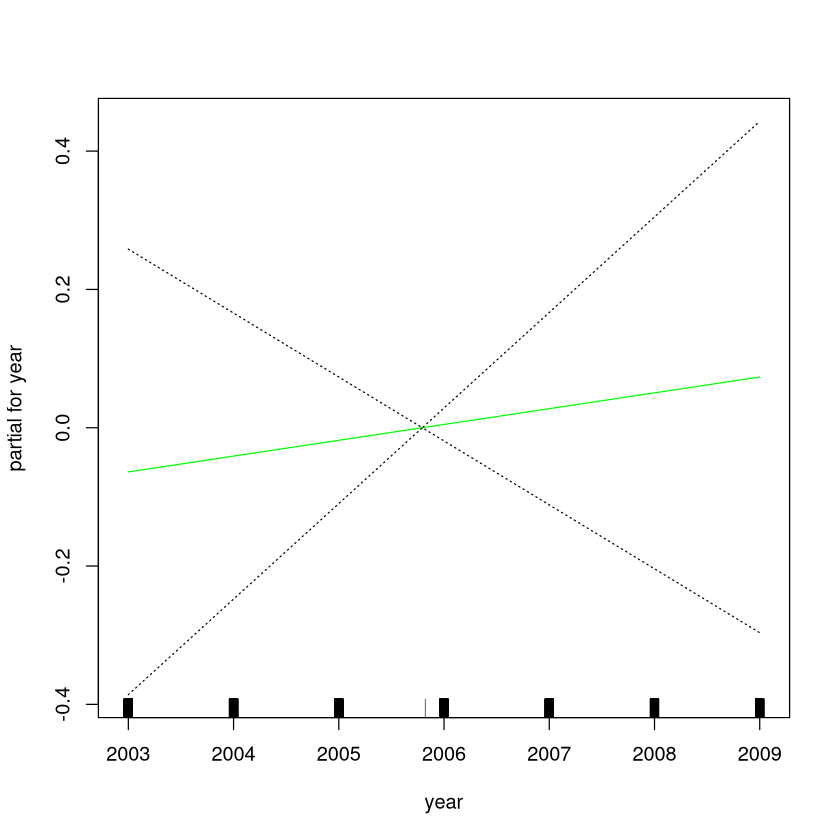

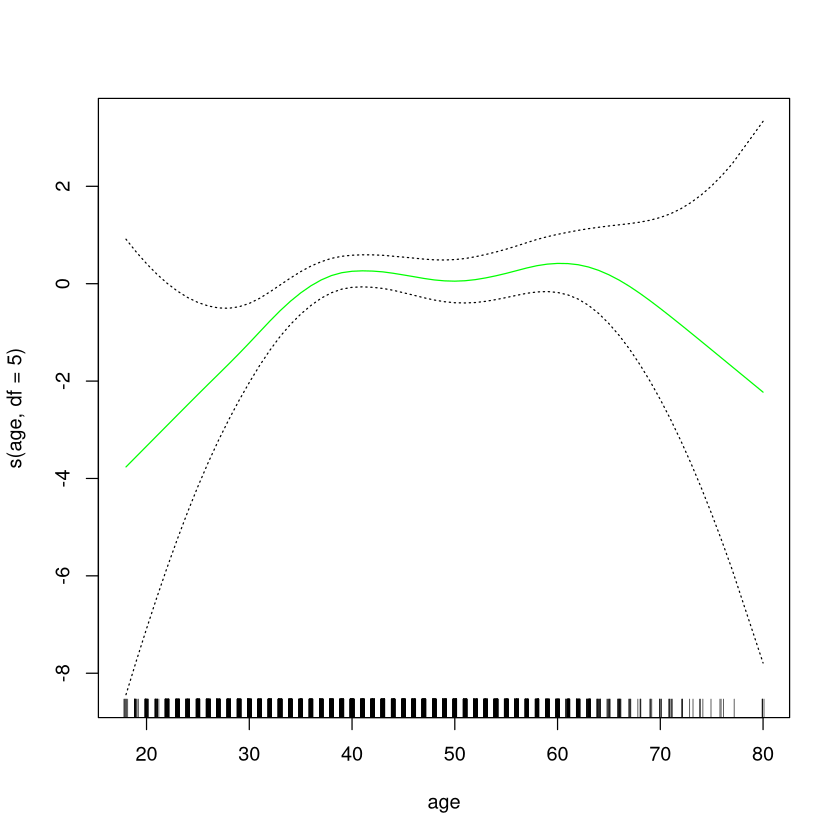

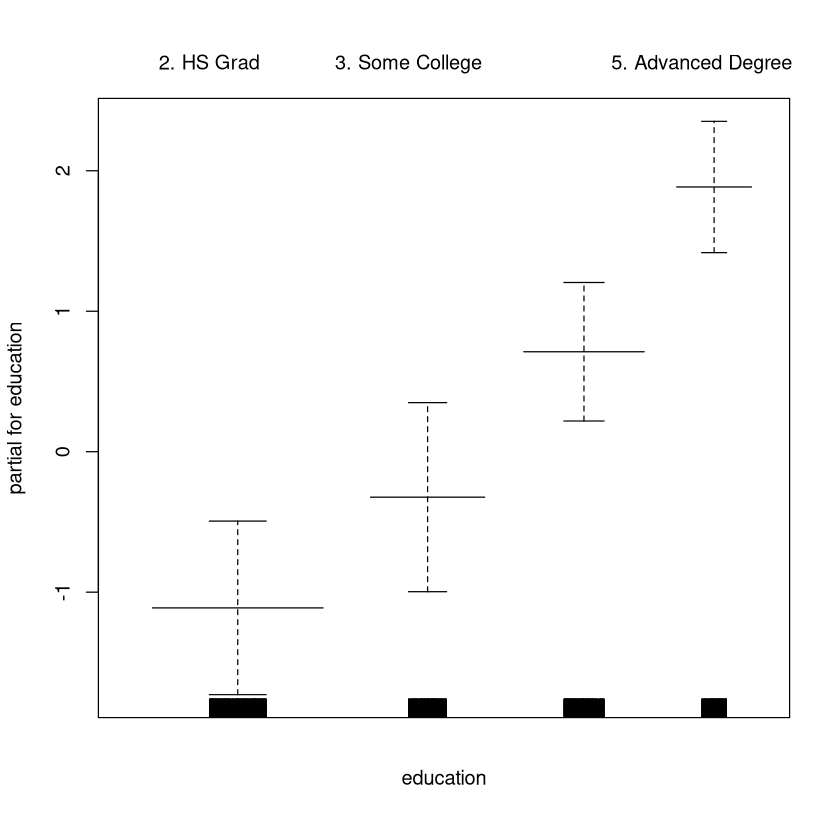

In [14]:
gam.lr.s <- gam( I(wage > 250) ~ year + s(age, df = 5) + education, family = binomial, data = Wage, subset = (education != "1. < HS Grad"))
plot(gam.lr.s, se = T, col = "green")